<a href="https://colab.research.google.com/github/Nithima20/customer_churn_prediction/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
import pandas as pd

# Load your dataset
df = pd.read_csv('Churn_Modelling_dataset.csv')  # Replace with your filename
print(df.shape)
df.head()

(10002, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [5]:
import pandas as pd

# Load your data
df = pd.read_csv('Churn_Modelling_dataset.csv')

# Rename 'exited' to 'Churn' for clarity
df.rename(columns={'exited': 'Churn'}, inplace=True)

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (or use imputation as needed)
df = df.dropna()

# Remove duplicates
df = df.drop_duplicates()

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# (No need to encode 'Churn' since it's already 0/1)
# Scale numerical features
from sklearn.preprocessing import StandardScaler

# Get numerical columns, EXCLUDING 'Churn' before get_dummies
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Remove 'Churn' only if it's in the list
if 'Churn' in numerical_cols:
    numerical_cols = numerical_cols.drop('Churn')

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


In [6]:
import pandas as pd

# Load your data
df = pd.read_csv('Churn_Modelling_dataset.csv')

# Fill missing categorical values with the most frequent value (mode)
df['Geography'].fillna(df['Geography'].mode()[0], inplace=True)
df['HasCrCard'].fillna(df['HasCrCard'].mode()[0], inplace=True)
df['IsActiveMember'].fillna(df['IsActiveMember'].mode()[0], inplace=True)

# Fill missing numerical value with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Check if all missing values are handled
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


<ipython-input-6-74598c5bfcd8>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Geography'].fillna(df['Geography'].mode()[0], inplace=True)
<ipython-input-6-74598c5bfcd8>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

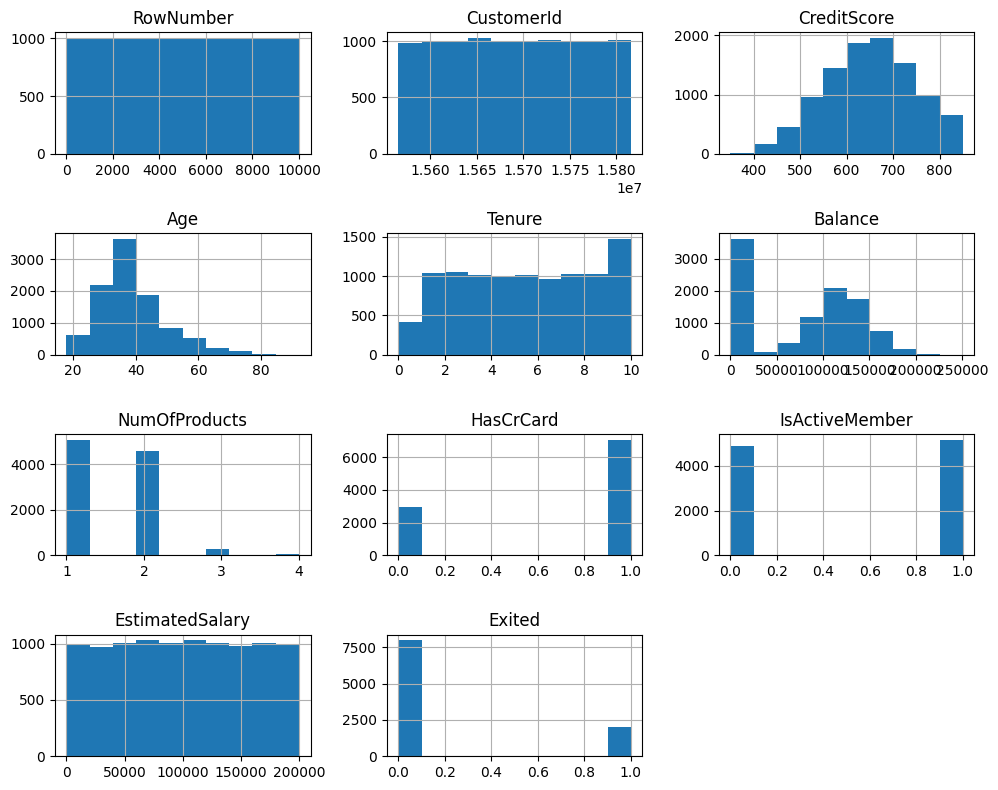

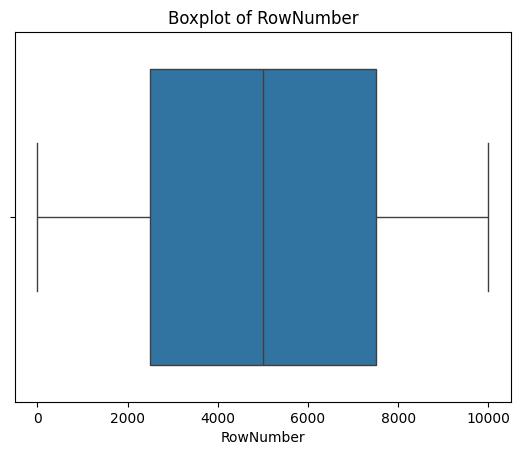

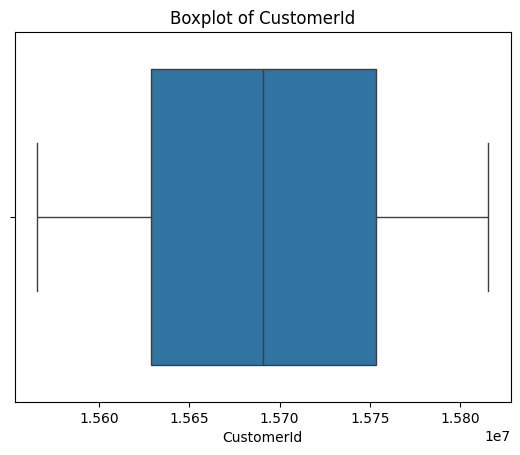

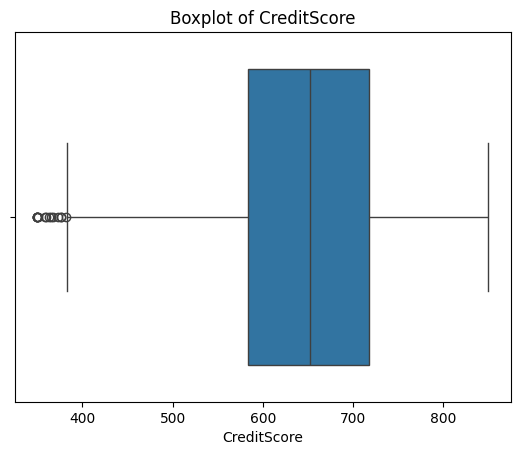

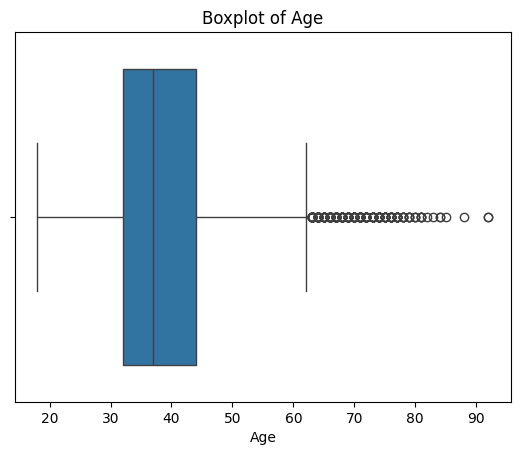

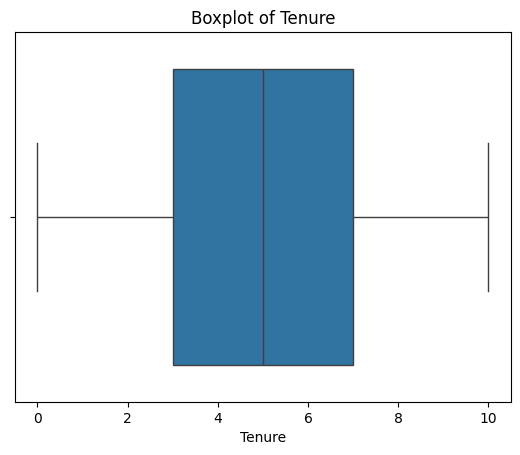

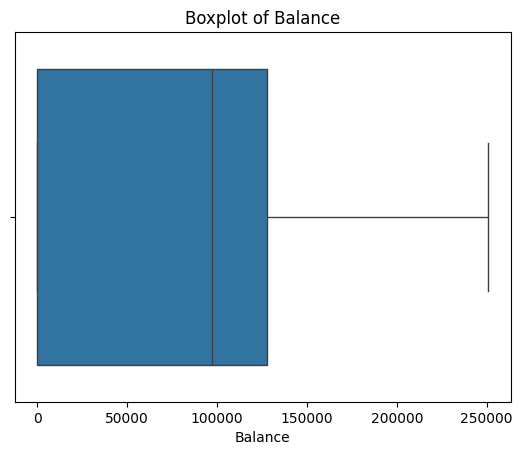

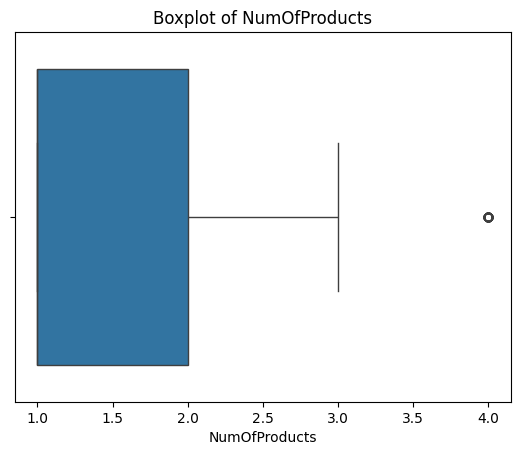

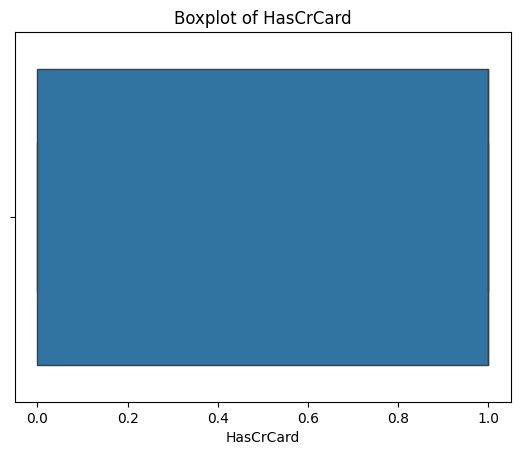

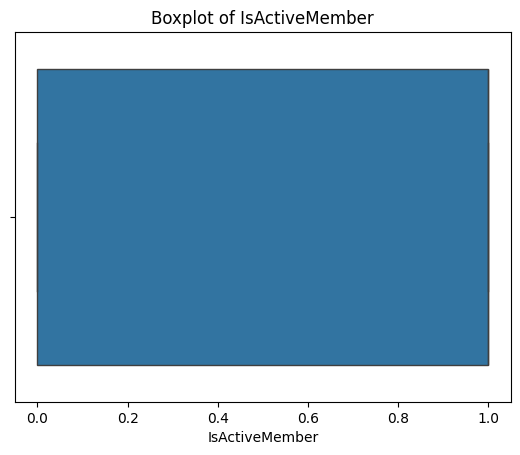

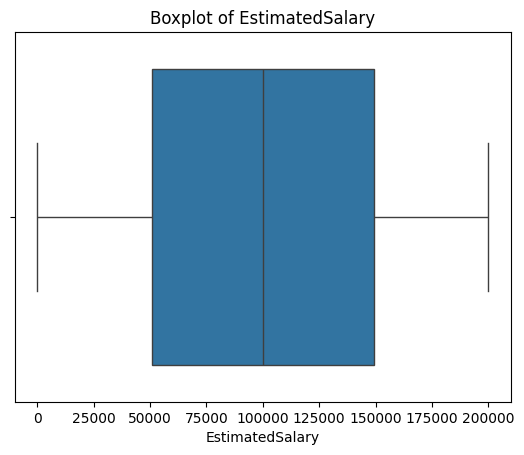

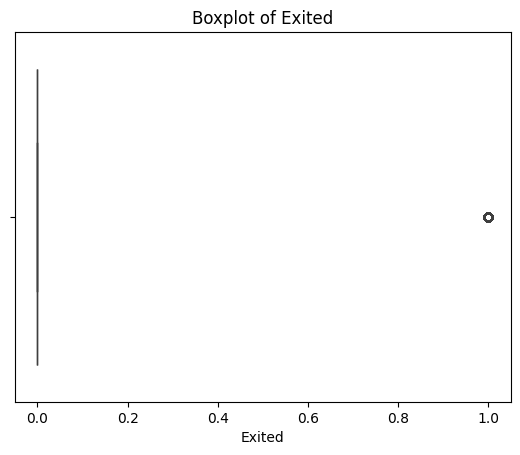

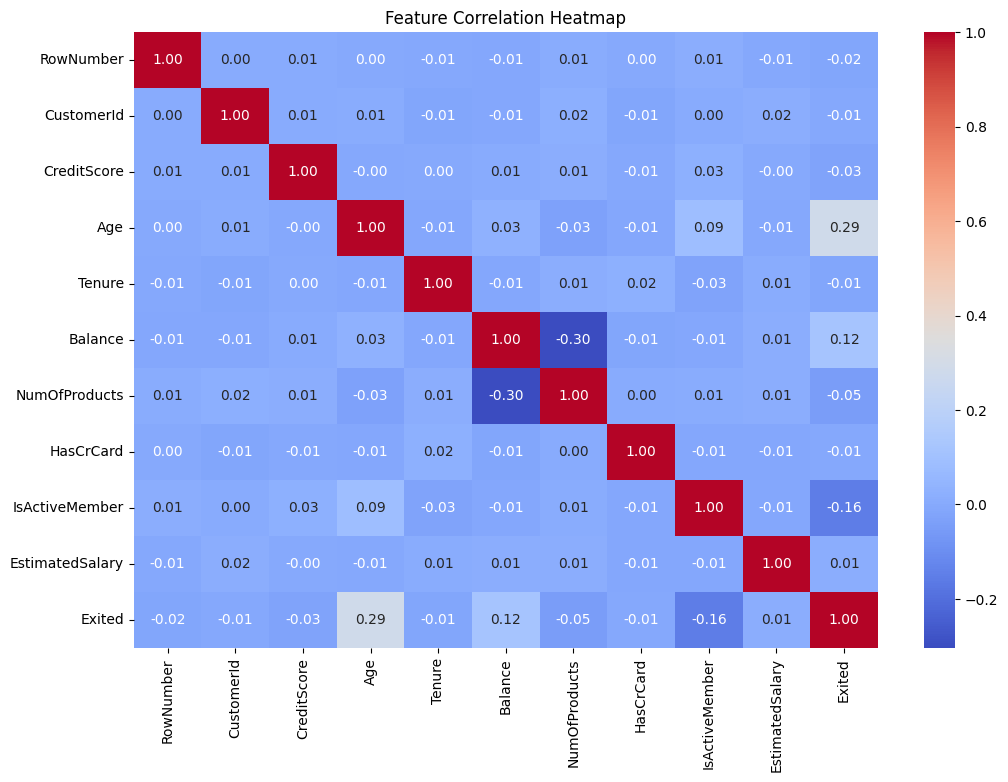

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame from previous cells

# ... (Your previous code to load and preprocess 'df') ...

# Select only numerical features for correlation
numerical_df = df.select_dtypes(include=['number'])

# Histogram for numerical features
numerical_df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Boxplot for outliers
for col in numerical_df.columns:  # Iterate over numerical columns only
    plt.figure()
    sns.boxplot(x=numerical_df[col])  # Use numerical_df
    plt.title(f'Boxplot of {col}')
    plt.show()

# Correlation heatmap using only numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')  # Use numerical_df
plt.title('Feature Correlation Heatmap')
plt.show()

In [8]:
import pandas as pd

# Example: Create a tenure group feature
df['TenureGroup'] = pd.cut(df['Tenure'],
                           bins=[0, 3, 6, 9, 12],
                           labels=['0-3', '4-6', '7-9', '10-12'])

# Select numerical features for correlation calculation
numerical_features = df.select_dtypes(include=['number']).columns

# Example: Select top features based on correlation with churn,
# using only numerical features
corr = df[numerical_features].corr()['Exited'].abs().sort_values(ascending=False)
top_features = corr[1:6].index  # Top 5 features excluding 'Churn'
print("Top features:", top_features)

# Example: Keep only the top features and the target
df = df[list(top_features) + ['Exited']]
print(df.head())

Top features: Index(['Age', 'IsActiveMember', 'Balance', 'NumOfProducts', 'CreditScore'], dtype='object')
    Age  IsActiveMember    Balance  NumOfProducts  CreditScore  Exited
0  42.0             1.0       0.00              1          619       1
1  41.0             1.0   83807.86              1          608       0
2  42.0             0.0  159660.80              3          502       1
3  39.0             0.0       0.00              2          699       0
4  43.0             1.0  125510.82              1          850       0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Feature and target selection
X = df[top_features]
y = df['Exited']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

Accuracy: 0.8030984507746127
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1599
           1       0.54      0.15      0.24       402

    accuracy                           0.80      2001
   macro avg       0.68      0.56      0.56      2001
weighted avg       0.76      0.80      0.76      2001



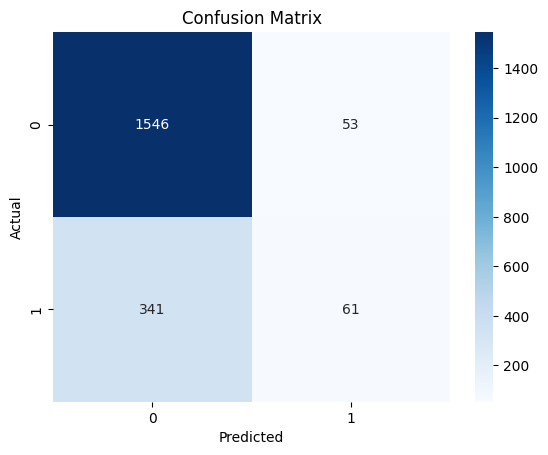

ROC-AUC Score: 0.7489576818845112


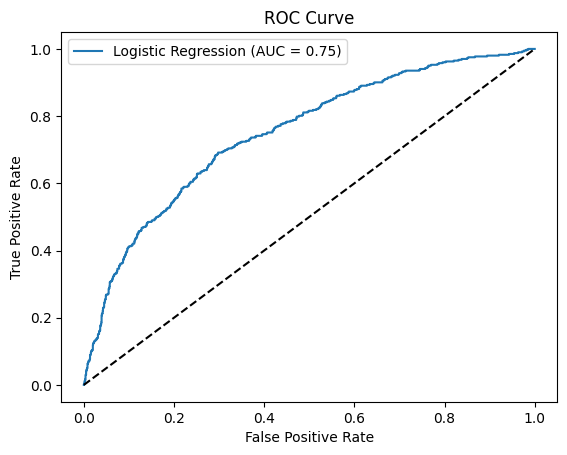

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC
y_prob = logreg.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()